I will be using handwritten digits datasets, it is a very standardized dataset and I believe it will be helpful to use this dataset for dimensionality reduction purposes.

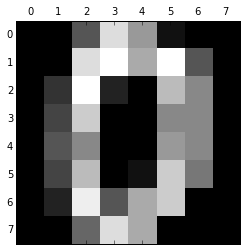

In [2]:
from sklearn.datasets import load_digits
%matplotlib inline
digits = load_digits()

import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

**Nearest-Neighbors:** We will use this algorithm to see the effect of dimensionality reduction.

For the nearest neighbor algorithm, I will write my own function. This function just finds the L2 distance between the sample input and all dataset and brings the closest item in the whole dataset (except itself).

In [3]:
import numpy as np

def nearestNeighbor(inX, dataMat, labelMat):
    dataSetSize = dataMat.shape[0]
    diffMat = np.tile(inX,(dataSetSize,1)) - dataMat
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    return labelMat[sortedDistIndicies[1]]
    
correctPredictions = 0
for i in range(10):
    print "Actual Value: ", digits.target[i], \
    "Predicted Value: ", nearestNeighbor(digits.data[i],digits.data,digits.target)
    correctPredictions+=digits.target[i] == nearestNeighbor(digits.data[i],digits.data,digits.target)
print "\nWith NN", correctPredictions, "correct out of 10\n\n"


Actual Value:  0 Predicted Value:  0
Actual Value:  1 Predicted Value:  1
Actual Value:  2 Predicted Value:  2
Actual Value:  3 Predicted Value:  3
Actual Value:  4 Predicted Value:  4
Actual Value:  5 Predicted Value:  9
Actual Value:  6 Predicted Value:  6
Actual Value:  7 Predicted Value:  7
Actual Value:  8 Predicted Value:  8
Actual Value:  9 Predicted Value:  9

With NN 9 correct out of 10




As you see, in 9 out of 10 cases NN algorithm correctly identified the label of the input digit. The only missing one is 5 vs 9, which sort of makes sense because the digits look pretty similar. 

**Dimensionality reduction:** Methods: PCA, MDS, LDA, LLE, Isomap, t-SNE, random projection.

I will start with one totally unsupervised algorithm and 
then switch to others. PCA is an unsupervised algorithm. 
It tries to project data to a lower dimension that will
maximize the variance. However, since it doesn't take 
labels into account, we don't expect it to differentiate
different numbers in this case.


/Users/halilakin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


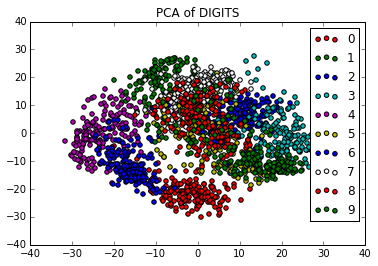

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import manifold
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit(digits.data).transform(digits.data)

plt.figure()
for c, i, target_name in zip(('r','g','b','c','m','y','b','w','r','g'), [0,1,2,3,4,5,6,7,8,9], digits.target):
    plt.scatter(X_pca[digits.target == i, 0], X_pca[digits.target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of DIGITS')



As seen from the graph, although there are some clear distinctions between different digits' lower level representations, some other digits are totally mixed up. We can't blame PCA, it didn't know anything about the labels.


This is where LDA comes into play. LDA tries a similar thing but takes labels into consideration. It tries to maximize between class variance with respect to within class variance. So, in this case we expect LDA to perform much better than PCA.

/Users/halilakin/anaconda/lib/python2.7/site-packages/sklearn/lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


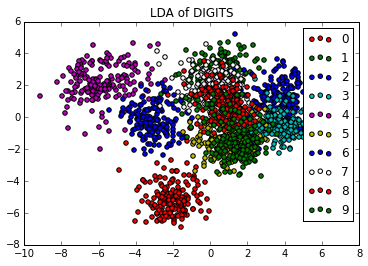

In [14]:
from sklearn.lda import LDA

lda = LDA(n_components=2)
X_lda = lda.fit(digits.data, digits.target).transform(digits.data)

plt.figure()
for c, i, target_name in zip(('r','g','b','c','m','y','b','w','r','g'), [0,1,2,3,4,5,6,7,8,9], digits.target):
    plt.scatter(X_lda[digits.target == i, 0], X_lda[digits.target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of DIGITS')

As we see, it is able to differentiate digits much better than PCA does, as expected. However, 1,7,8 is pretty mixed up.  1 and 7 look pretty similar to humans, as well and 8 is actually all over the place.

Although, I dont expect it to perform well, I will try to check MDS results. MDS attempts to model similarity and dissimilarity of the data as distances in geometric spaces. Although this is the metric version of MDS which takes the distances into account, I will use nonmetric version to see how it performs on such high dimensionality data set and also for fun.

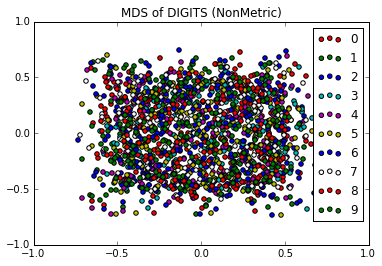

In [9]:
mds = manifold.MDS(metric=0,n_components=2, max_iter=100, n_init=1)
X_mds = mds.fit_transform(digits.data)

plt.figure()
for c, i, target_name in zip(('r','g','b','c','m','y','b','w','r','g'), [0,1,2,3,4,5,6,7,8,9], digits.target):
    plt.scatter(X_mds[digits.target == i, 0], X_mds[digits.target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('MDS of DIGITS (NonMetric)')


I don't blame MDS for the result. It didn't take pixel values into account but only similarity and dissimilarity. Since, I wasn't expecting anything I will just skip this part. But, MDS would work much better (not better than LDA, I guess) if we provided it to measure distances by setting metric=1.

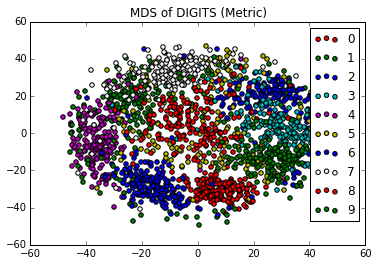

In [15]:
mds = manifold.MDS(metric=1,n_components=2, max_iter=100, n_init=1)
X_mds = mds.fit_transform(digits.data)

plt.figure()
for c, i, target_name in zip(('r','g','b','c','m','y','b','w','r','g'), [0,1,2,3,4,5,6,7,8,9], digits.target):
    plt.scatter(X_mds[digits.target == i, 0], X_mds[digits.target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('MDS of DIGITS (Metric)')


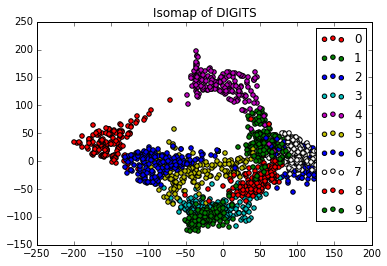

In [16]:
isomap = manifold.Isomap(n_components=2, )
X_isomap = isomap.fit_transform(digits.data)

plt.figure()
for c, i, target_name in zip(('r','g','b','c','m','y','b','w','r','g'), [0,1,2,3,4,5,6,7,8,9], digits.target):
    plt.scatter(X_isomap[digits.target == i, 0], X_isomap[digits.target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('Isomap of DIGITS')


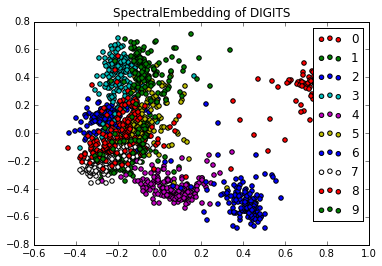

In [17]:
spectralembedding = manifold.SpectralEmbedding(n_components=2, )
X_spectralembedding = spectralembedding.fit_transform(digits.data)

plt.figure()
for c, i, target_name in zip(('r','g','b','c','m','y','b','w','r','g'), [0,1,2,3,4,5,6,7,8,9], digits.target):
    plt.scatter(X_spectralembedding[digits.target == i, 0], X_spectralembedding[digits.target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('SpectralEmbedding of DIGITS')


t-SNE is a visualization and dimensionality reduction technique developed by Laurens van der Maaten and Geoffrey Hinton. It's pretty new compared with others and sort of the cool kid of dimensionality reduction techniques. It is also specifically designed for visualization of high dimension data in 2-3d space, we expect it to perform really well.

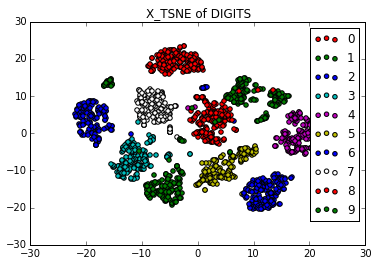

In [19]:
tsne = manifold.TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(digits.data,digits.target)

plt.figure()
for c, i, target_name in zip(('r','g','b','c','m','y','b','w','r','g'), [0,1,2,3,4,5,6,7,8,9], digits.target):
    plt.scatter(X_tsne[digits.target == i, 0], X_tsne[digits.target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('X_TSNE of DIGITS')


Comparing the algorithms that I used I believe t-SNE and LDA makes most sense. PCA and MDS are very bad choices because PCA don't make use of labels and MDS is not very effective in our example. 

** 5.Finding Nearest-Neighbors in low dimensions

In [20]:
correctPredictions = 0
for i in range(10):
    print "Actual: ", digits.target[i], \
    "Predicted : ", nearestNeighbor(X_pca[i],X_pca,digits.target)
    correctPredictions+=digits.target[i] == nearestNeighbor(X_pca[i],X_pca,digits.target)
print "\nWith PCA", correctPredictions, " correct out of 10\n\n"
    
correctPredictions = 0
for i in range(10):
    print "Actual: ", digits.target[i], \
    "Predicted : ", nearestNeighbor(X_lda[i],X_lda,digits.target)
    correctPredictions+=digits.target[i] == nearestNeighbor(X_lda[i],X_lda,digits.target)
print "\nWith LDA", correctPredictions, " correct out of 10\n\n"


correctPredictions = 0
for i in range(10):
    print "Actual: ", digits.target[i], \
    "Predicted : ", nearestNeighbor(X_mds[i],X_mds,digits.target)
    correctPredictions+=digits.target[i] == nearestNeighbor(X_mds[i],X_mds,digits.target)
print "\nWith MDS", correctPredictions, " correct out of 10\n\n"


correctPredictions = 0
for i in range(10):
    print "Actual: ", digits.target[i], \
    "Predicted : ", nearestNeighbor(X_tsne[i],X_tsne,digits.target)
    correctPredictions+=digits.target[i] == nearestNeighbor(X_tsne[i],X_tsne,digits.target)
print "\nWith T-SNE", correctPredictions, " correct out of 10\n\n"


Actual:  0 Predicted :  0
Actual:  1 Predicted :  1
Actual:  2 Predicted :  1
Actual:  3 Predicted :  3
Actual:  4 Predicted :  4
Actual:  5 Predicted :  3
Actual:  6 Predicted :  6
Actual:  7 Predicted :  7
Actual:  8 Predicted :  8
Actual:  9 Predicted :  5

With PCA 7  correct out of 10


Actual:  0 Predicted :  0
Actual:  1 Predicted :  1
Actual:  2 Predicted :  1
Actual:  3 Predicted :  3
Actual:  4 Predicted :  4
Actual:  5 Predicted :  2
Actual:  6 Predicted :  6
Actual:  7 Predicted :  1
Actual:  8 Predicted :  8
Actual:  9 Predicted :  5

With LDA 6  correct out of 10


Actual:  0 Predicted :  0
Actual:  1 Predicted :  1
Actual:  2 Predicted :  5
Actual:  3 Predicted :  3
Actual:  4 Predicted :  1
Actual:  5 Predicted :  9
Actual:  6 Predicted :  6
Actual:  7 Predicted :  7
Actual:  8 Predicted :  8
Actual:  9 Predicted :  5

With MDS 6  correct out of 10


Actual:  0 Predicted :  0
Actual:  1 Predicted :  1
Actual:  2 Predicted :  2
Actual:  3 Predicted :  3
Actual:  4 Predic

The original success rate was 9/10. Since we lose information with dimensionality reduction, we didn't expect any of the techniques to improve this score.  

PCA got 7 out of 10 correct which surprised me a lot (later I ran it with a bigger set, the performance is around 50/100), and LDA got 6 out of 10 correct (which also surprised me because I expected it to be better than PCA, so I ran it 100 times, it is actually better than PCA and scored 63/100).

t-SNE got 9 out of 10 correct, which was expected after seeing the job it did in terms of visualization.

MDS ?. It only got 2 correct. The metric version would have gotten many more, though.